<a href="https://colab.research.google.com/github/tcruz88/CNN_project/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import os
import cv2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


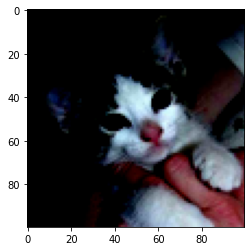

[1. 0.]
[[[-0.96862745 -0.96862745 -0.98431373]
  [-0.98431373 -0.98431373 -1.        ]
  [-0.97647059 -0.97647059 -0.99215686]
  ...
  [-0.96862745 -0.96078431 -1.        ]
  [-0.96078431 -0.95294118 -1.        ]
  [-0.91372549 -0.89803922 -0.95294118]]

 [[-0.98431373 -0.98431373 -0.99215686]
  [-0.98431373 -0.98431373 -1.        ]
  [-0.98431373 -0.98431373 -1.        ]
  ...
  [-0.97647059 -0.96862745 -1.        ]
  [-0.89019608 -0.88235294 -0.91372549]
  [-0.65490196 -0.65490196 -0.67058824]]

 [[-0.96862745 -0.96862745 -0.98431373]
  [-0.98431373 -0.98431373 -1.        ]
  [-0.98431373 -0.98431373 -1.        ]
  ...
  [-0.83529412 -0.82745098 -0.88235294]
  [-0.56862745 -0.56862745 -0.56862745]
  [-0.38039216 -0.39607843 -0.34117647]]

 ...

 [[-0.95294118 -0.94509804 -0.98431373]
  [-0.96078431 -0.95294118 -0.99215686]
  [-0.95294118 -0.94509804 -0.98431373]
  ...
  [ 0.56078431  0.20784314  0.23921569]
  [ 0.49019608  0.16862745  0.20784314]
  [ 0.49803922  0.20784314  0.247058

In [ ]:
#image data shape (n, width, height, rgb value)

X = [] # Images
Y = [] # Categories

folder_cat = 'cats'
folder_dog = 'dogs'

name_encode = {"cat":0, "dog":1}

def images_to_array(folder, name):
    for image in os.listdir(folder):
        loaded_image = Image.open(os.path.join(folder, image))  #loading image
        resized_image = Image.Image.resize(loaded_image, [100,100]) #resize image to 100 x 100 px
        image_array = np.array(resized_image) # transform image into an array
        X.append(image_array) # append images to array X
        Y.append(name_encode[name]) #append category

        image_flipped = cv2.flip(image_array,1) #create copies of images flipped horizontally to improve model accuracy
        X.append(image_flipped)
        Y.append(name_encode[name])

        # image_blurred = cv2.blur(image_array,(2,2)) #create copies of images blurred to improve accuracy
        # X.append(image_blurred)
        # Y.append(name_encode[name])

        ### Add more image processing, run on deskstop with GPU runtime

        # image_flipped_blurred = cv2.blur(image_flipped,(2,2)) #create copies of images flipped horizontally & blurred to improve accuracy
        # X.append(image_flipped_blurred)
        # Y.append(name_encode[name])

def show_image(index):
    plt.imshow(X[index]) # plt.imshow(np.uint8(X[index])) 
    plt.show()
    print(Y[index])

images_to_array(folder_cat, "cat")
images_to_array(folder_dog, "dog")

Y = to_categorical(Y, num_classes=2)
X = (np.array(X) - 127.5) / 127.5 #normalization of data

show_image(0)
print(X[0])

In [ ]:
from keras.layers import Activation, Conv2D, Dense, Flatten, MaxPool2D, BatchNormalization, Dropout
from keras.models import Sequential

model = Sequential()

model.add(Conv2D(32, (5,5), padding='same',activation='relu', input_shape=(100,100,3) ))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5)) # muting 1/3 of trainable parameters
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(100, (5,5), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5)) # muting 1/3 of trainable parameters
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(100, (5,5), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.50)) 
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(100, (5,5), padding='same',activation='relu'))
# model.add(BatchNormalization())
model.add(Dropout(rate=0.50)) 
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(124))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 32)      128       
_________________________________________________________________
dropout (Dropout)            (None, 100, 100, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 100)       80100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 100)       400       
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50, 100)       0

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.1)

# print(X[10])

Epoch 1/10
450/450 [==============================] - 49s 34ms/step - loss: 1.0870 - acc: 0.5882 - val_loss: 1.0251 - val_acc: 0.5756
Epoch 2/10
450/450 [==============================] - 12s 27ms/step - loss: 0.5962 - acc: 0.6836 - val_loss: 2.5489 - val_acc: 0.5263
Epoch 3/10
450/450 [==============================] - 12s 27ms/step - loss: 0.5263 - acc: 0.7359 - val_loss: 1.1559 - val_acc: 0.6019
Epoch 4/10
450/450 [==============================] - 12s 27ms/step - loss: 0.4681 - acc: 0.7742 - val_loss: 0.7047 - val_acc: 0.6875
Epoch 5/10
450/450 [==============================] - 12s 27ms/step - loss: 0.4071 - acc: 0.8124 - val_loss: 0.7387 - val_acc: 0.7050
Epoch 6/10
450/450 [==============================] - 12s 27ms/step - loss: 0.3480 - acc: 0.8441 - val_loss: 0.7516 - val_acc: 0.7006
Epoch 7/10
450/450 [==============================] - 12s 27ms/step - loss: 0.3018 - acc: 0.8683 - val_loss: 0.6486 - val_acc: 0.7569
Epoch 8/10
450/450 [==============================] - 12s 27ms

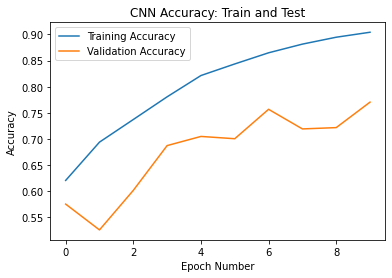

In [ ]:
from keras.optimizers import Adam

optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])
h = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test,y_test))
model.save('catdog_CNN.h5')

plt.plot(h.history['acc'], label='Training Accuracy')
plt.plot(h.history['val_acc'], label='Validation Accuracy')
plt.title("CNN Accuracy: Train and Test")
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

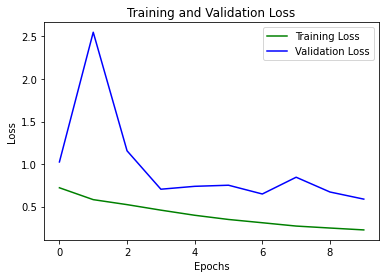

In [ ]:
loss_train = h.history['loss']
loss_val = h.history['val_loss']

plt.plot(loss_train, 'g', label='Training Loss')
plt.plot(loss_val, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Actual: CAT
3423
Prediction: CAT


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


*****************


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: CAT
1612
Prediction: CAT
*****************


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: DOG
4018
Prediction: CAT
*****************


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: DOG
4020
Prediction: CAT
*****************


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: CAT
3692
Prediction: CAT
*****************


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: DOG
4861
Prediction: CAT
*****************


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: CAT
3544
Prediction: CAT
*****************


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: DOG
7870
Prediction: CAT
*****************


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: CAT
2093
Prediction: CAT
*****************


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: DOG
5951
Prediction: CAT
*****************


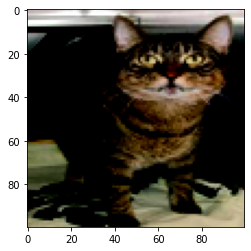

In [ ]:
from keras.models import load_model

model = load_model('catdog_CNN.h5')

def prediction(index_number):
  img = np.array(X[index_number]) 
  img = img.reshape(1,100,100,3) # (n number of images, h, w, rgb)
  prediction = model.predict_classes(img)
  if prediction == 0:
    print('Prediction: CAT')
  elif prediction == 1:
    print('Prediction: DOG')
  else:
    print('Prediction: Error')
  plt.imshow(X[index_number])
  plt.show

import random
import time

for i in range(10):
     rand = random.randrange(0,7999)
     if rand < 4000:
        print('Actual: CAT')
     else:
        print('Actual: DOG')
     print(rand)
     prediction(rand)
     print('*****************')
     time.sleep(1) 

# Cat: 0 - 3999
# Dog: 4000 - 7999
# Cat = 0, Dog = 1

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction: DOG


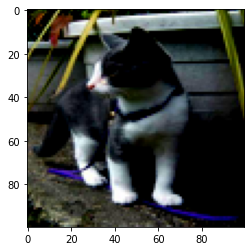

In [ ]:
prediction(4134)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Prediction: CAT


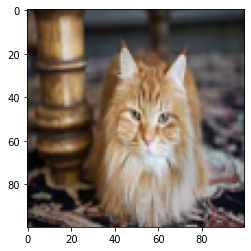

In [ ]:
model = load_model('catdog_CNN.h5')

def prediction(image_path):
  img_loaded = Image.open(image_path)
  img_resized = Image.Image.resize(img_loaded, (100,100))
  img = np.array(img_resized) 
  img = img.reshape(1,100,100,3) # (n number of images, h, w, rgb)
  prediction = model.predict_classes(img)
  if prediction == 0:
    print('Prediction: CAT')
  elif prediction == 1:
    print('Prediction: DOG')
  else:
    print('Prediction: Error')
  plt.imshow(img_resized)
  plt.show

prediction('cat_sample.jpg')
# Cat: 0 - 3999
# Dog: 4000 - 7999
# Pedestrian = cat or 0, Road = dog or 1

Prediction: CAT


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


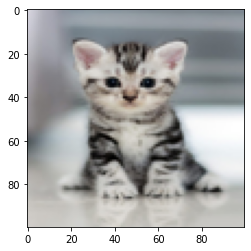

In [ ]:
prediction('cat_sample_2.jpg')

Prediction: CAT


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


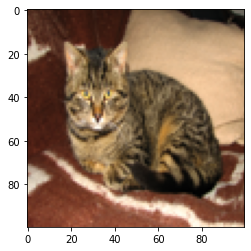

In [ ]:
prediction('cat_sample_3.jpg')

Prediction: CAT


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


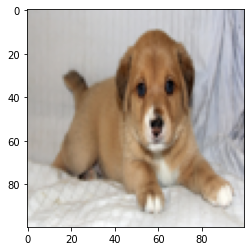

In [ ]:
prediction('dog_sample.jpg')

Prediction: DOG


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


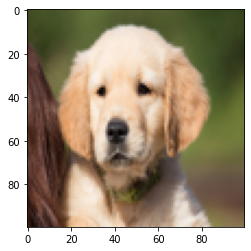

In [ ]:
prediction('dog_sample_2.jpg')

Prediction: DOG


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


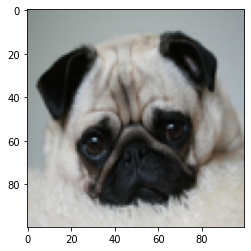

In [ ]:
prediction('dog_sample_3.jpg')